In [1]:

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import classification_report
from scipy.stats import mode
# Loading the Iris dataset

In [2]:
df1=pd.read_csv('IBM_Churn.csv')
df1

FileNotFoundError: [Errno 2] No such file or directory: 'IBM_Churn.csv'

In [ ]:
df1.info()

In [152]:
df1['TotalCharges'].isnull().sum()

0

In [523]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [524]:
df1['TotalCharges'].isnull().sum()

11

In [513]:
df1 = df1.dropna(subset=['TotalCharges'])
df1.reset_index(drop=True, inplace=True)

In [514]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df1.copy()
label_encoder=LabelEncoder()
for column in df_encoded.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [515]:
df_encoded=df1.copy()
df_encoded=df1.apply(label_encoder.fit_transform)
df_encoded

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,4843,1,0,1,1,23,1,2,0,2,...,2,2,2,2,1,1,3,990,3700,0
7028,1524,0,0,1,1,71,1,2,1,0,...,2,0,2,2,1,1,1,1339,6304,0
7029,3358,0,0,1,1,10,0,1,0,2,...,0,0,0,0,0,1,2,137,1265,0
7030,5923,1,1,1,0,3,1,2,1,0,...,0,0,0,0,0,1,3,794,1157,1


In [516]:
df_encoded.drop(columns=['customerID'], inplace=True)

In [517]:
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,23,1,2,0,2,0,2,2,2,2,1,1,3,990,3700,0
7028,0,0,1,1,71,1,2,1,0,2,2,0,2,2,1,1,1,1339,6304,0
7029,0,0,1,1,10,0,1,0,2,0,0,0,0,0,0,1,2,137,1265,0
7030,1,1,1,0,3,1,2,1,0,0,0,0,0,0,0,1,3,794,1157,1


In [519]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [518]:
df_encoded.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [399]:
X1=df_encoded.drop(columns=['Churn'])
y1=df_encoded['Churn']
y1

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int32

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2,shuffle=True)

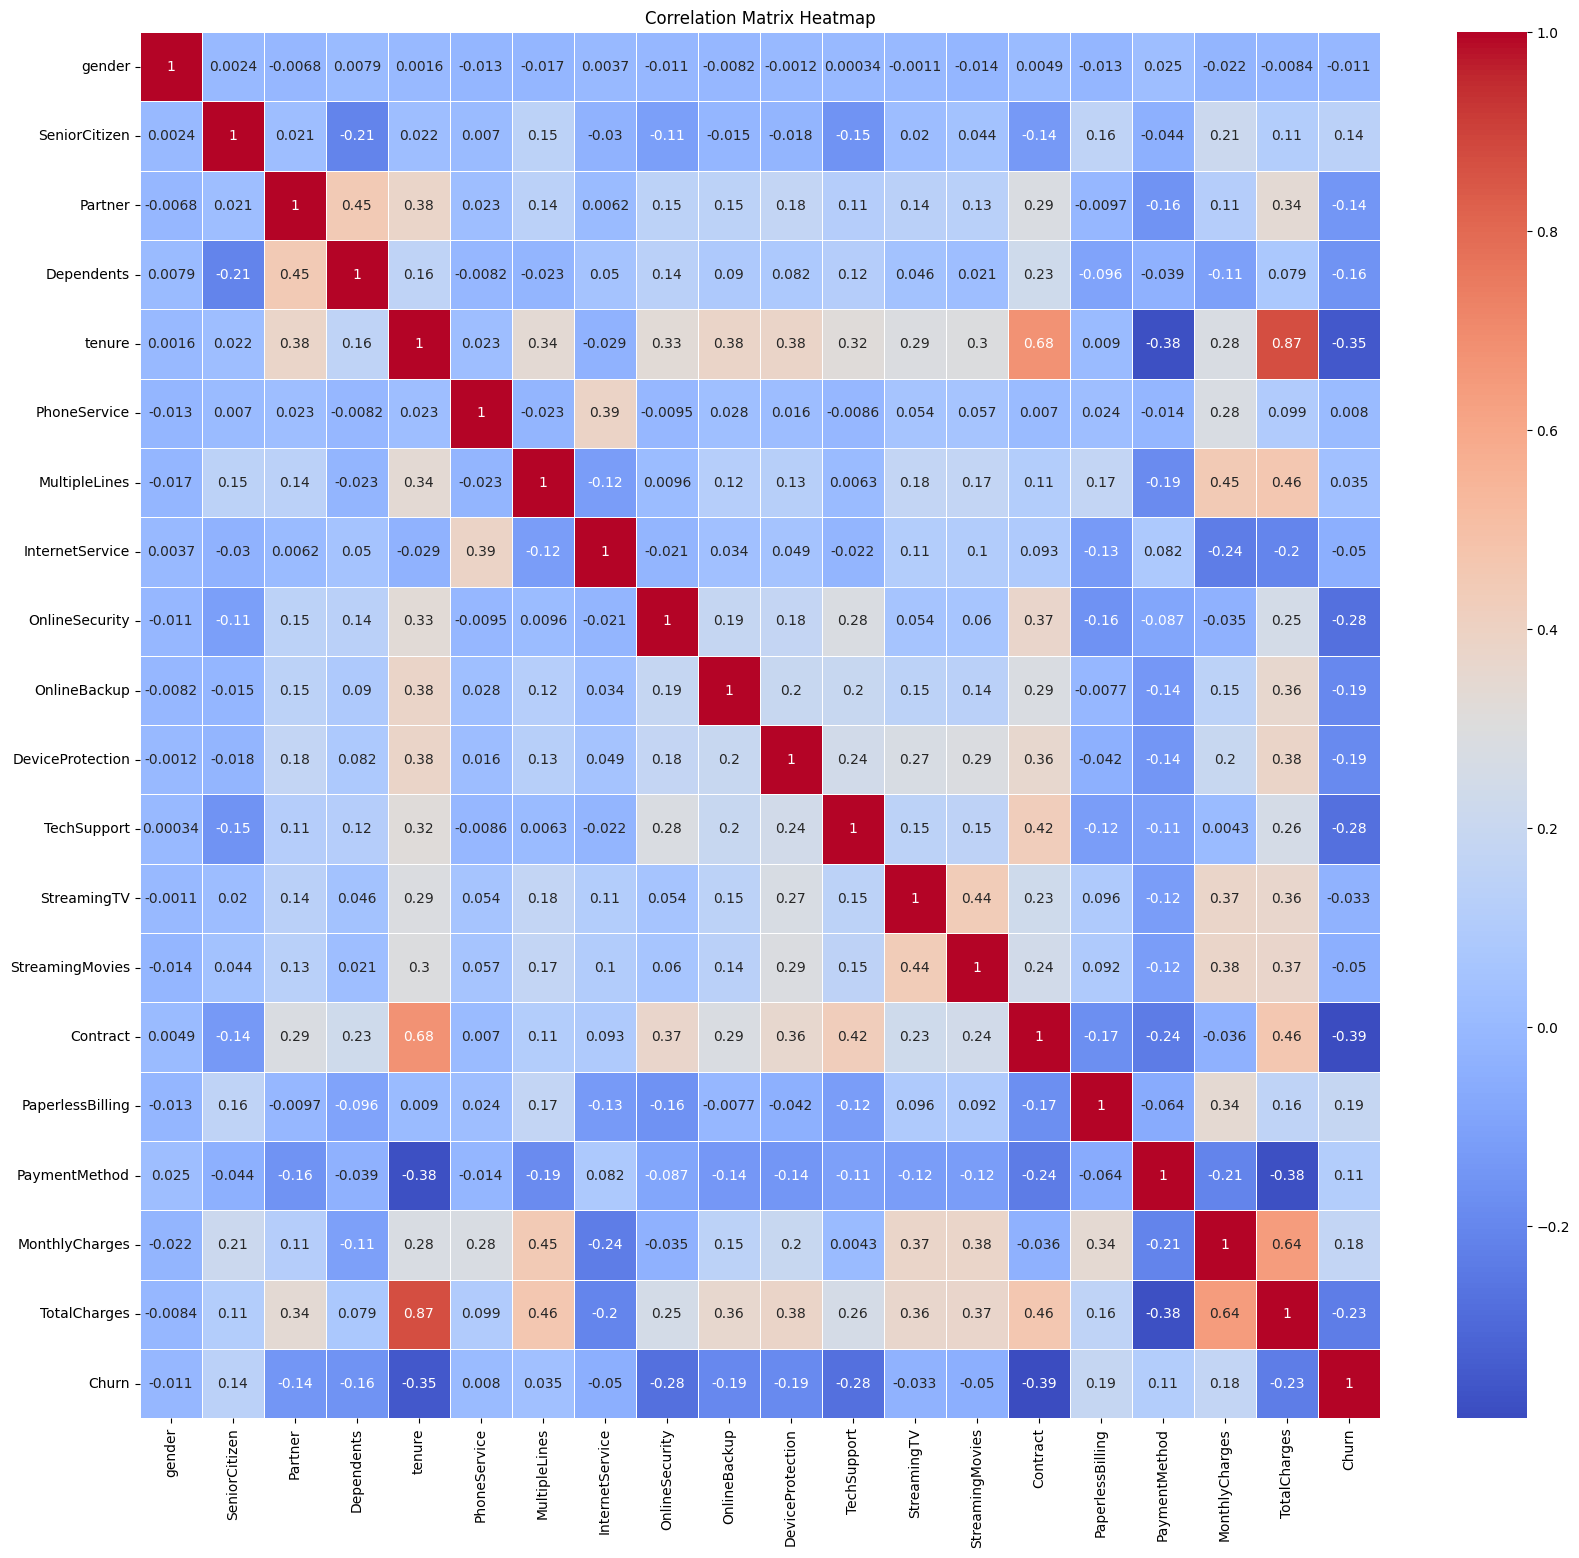

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
X_train_with_class = X_train.copy()
X_train_with_class['Churn'] = y_train
corr_matrix = X_train_with_class.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')
plt.show()


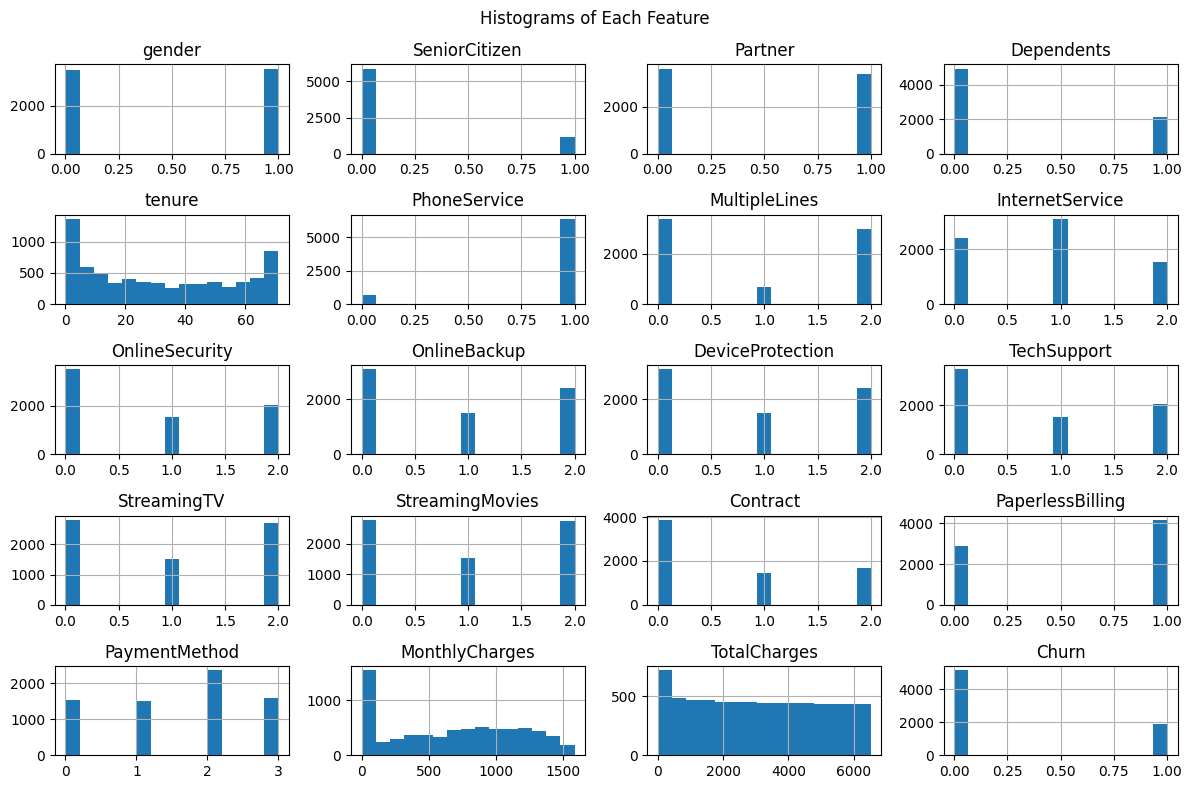

ValueError: Could not interpret value `maint` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [510]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded.hist(figsize=(12, 8), bins=15)
plt.suptitle('Histograms of Each Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='maint', y='safety', hue='class', data=df_encoded, palette='Set1')
plt.title('Scatter Plot: Maintenance vs Safety')
plt.show()

sns.pairplot(df_encoded, hue='class', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()